<a href="https://colab.research.google.com/github/samuelgamaral/PreverSpam/blob/main/PreverSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

!git clone https://github.com/samuelgamaral/PreverSpam.git

df = pd.read_csv("/content/PreverSpam/emails_dataset.csv")  # Substitua pelo nome do seu arquivo

# Visualizando os dados
display(df.head())

# Unindo as colunas textuais
df["Texto"] = df["Assunto"].fillna("") + " " + df["Corpo"].fillna("")

# Removendo colunas indesejadas
df = df.drop('ID', axis=1)
df = df.drop('Assunto', axis=1)
df = df.drop('Corpo', axis=1)
df = df.drop('Data', axis=1)

# O uso do label encoder se deu por conta da classificação binária, transformando spam em 1 e não spam em 0
label_encoder = LabelEncoder()
df["Rótulo"] = label_encoder.fit_transform(df["Rótulo"])  # 1 = spam, 0 = não spam

# Vetorização do texto para usa-lo no modelo.
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["Texto"])

# Visualizando o df após o tratamento
print("\nDataFrame Pós Tratamento")
display(df.head())

# Divisão dos dados para treinamento e avaliação
X_train, X_test, y_train, y_test = train_test_split(X, df["Rótulo"], test_size=0.2, random_state=42)

# Criar e treinar o modelo. O modelo escolhido foi KNN pela sua otimização para lidar com similaridade e relevância dentro de contextos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazer previsão
y_pred = knn.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo KNN: {accuracy:.2f}")

fatal: destination path 'PreverSpam' already exists and is not an empty directory.


,ID,Assunto,Corpo,Remetente,Data,Rótulo
0,01ab8a1b-2996-495e-9a6e-26b4c7594191,Empréstimo rápido e sem burocracia,Seu cartão de crédito foi aprovado! Clique no ...,muellercassidy@example.com,2022-08-19,spam
1,3ab82044-0550-418e-8115-e407a4a8735c,Novo projeto para revisão,Confirmando nossa reunião agendada para o dia ...,waretimothy@example.net,2020-08-08,não spam
2,bec7108f-1d99-4ea3-adc8-ced36f1466fc,Relatório financeiro de dezembro,Segue a nota fiscal de compra da última transa...,brockdustin@example.org,2023-11-21,não spam
3,0a86aea1-0421-4759-8a75-aef25d141883,Ganhe dinheiro fácil!,Não perca a oportunidade de fazer um investime...,youngelizabeth@example.com,2022-05-30,spam
4,9179daa7-e614-4af5-b008-e59003a0b29a,Seu cartão de crédito foi aprovado,Não perca a oportunidade de fazer um investime...,felliott@example.net,2021-03-16,spam



DataFrame Pós Tratamento


,Remetente,Rótulo,Texto
0,muellercassidy@example.com,1,Empréstimo rápido e sem burocracia Seu cartão ...
1,waretimothy@example.net,0,Novo projeto para revisão Confirmando nossa re...
2,brockdustin@example.org,0,Relatório financeiro de dezembro Segue a nota ...
3,youngelizabeth@example.com,1,Ganhe dinheiro fácil! Não perca a oportunidade...
4,felliott@example.net,1,Seu cartão de crédito foi aprovado Não perca a...


Acurácia do modelo KNN: 1.00


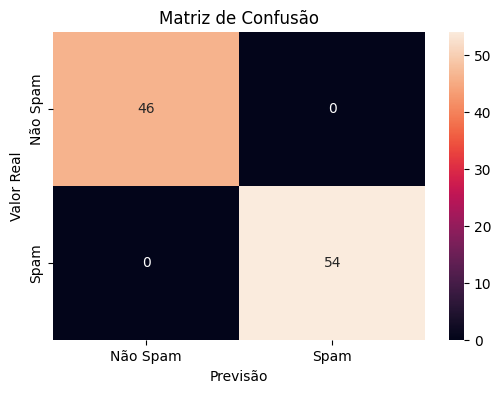

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Com a matriz de confusão é possível verificar graficamente a comparação entre os valores reais e as previsões feitas pelo modelo.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, xticklabels=["Não Spam", "Spam"], yticklabels=["Não Spam", "Spam"])
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()

In [10]:
import joblib

# Salvar o modelo para uso futuro
joblib.dump(knn, 'modelo_knn.pkl')

['modelo_knn.pkl']